
## TP 3 : Sods Shock Tube.

---

Binôme : Khaled Ibrahim & Servranckx Christophe.

---

Pour ce 3ème travail personnel nous allons nous intéresser au problème du "tube à chocs". 

Brièvement, il s'agit d'un tube contenant un gaz et séparé en 2 régions par un diaphragme infiniment mince. Le gaz contenu dans ces deux régions étant initialement à des pressions différentes, la rupture instantanée du diaphragme aura pour conséquence de généré une onde de choc (à 1 dimension) à l'intérieur du tube. 

L'objectif de ce travail personnel est alors de calculer la pression, la densité et la vitesse du gaz compressible au travers du tube à chocs et ce pour un instant qui succède la rupture du diaphragme. Pour se faire nous utiliserons la méthode de Richtmyer introduite dans la partie théorique de l'énoncé de ce travail personnel.

---
##### 1. Rappel & développement théorique:

---

#### 1.1 Les équations d'Euler.
---

Comme annoncé dans l'énoncé du problème, les équations d'Euler gouverne le mouvement d'un fluide non-visqueux. Par conséquent elles vont nous permettrent de décrire l'écoullement à 1 dimension du gaz dans le tube à chocs lorsque le diaphragme est rompu.

Les équations d'Euler sont ainsi constituées des équations suivantes :

$$
\left\{
    \begin{array}{lll}
        &\frac{\partial \rho}{\partial t} + \frac{\partial}{\partial x}(\rho u) = 0 & \mbox{(conservation de la masse)}\\
        &\frac{\partial}{\partial t}(\rho u) + \frac{\partial}{\partial x} (\rho u^2 + p) = 0 & \mbox{(conservation de la QDM)}\\
        &\frac{\partial}{\partial t}(\rho e_T) + \frac{\partial}{\partial x} (\rho u e_T +p u)= 0 & \mbox{(conservation de l'énergie)}
    \end{array}
\right.
$$

où 

$$
    \begin{array}{ll}
        \mbox{QDM signifie "quantité de mouvements"}\\
        e_T = e+u^2/2 \mbox{, est l'énergie totale par unité de masse}\\
        \rho \mbox{, est la ddensité du fluide}\\
        u \mbox{, est la vitesse du fluide}\\
        p \mbox{, est la pression du fluide}\\
    \end{array}
$$

Les équations d'Euler, sous la forme conservative (fournissant des résultats plus précis), peuvent alors être écritent sous forme vectorielle comme suit :


\begin{equation}
\frac{\partial }{\partial t} \overline{\mathbf{u}} + \frac{\partial }{\partial x} \overline{\mathbf{f}} = 0
\end{equation}
avec $\overline{\mathbf{u}}$ le vecteur des variables conservées et $\overline{\mathbf{f}}$ le vecteur de flux, donnés par :

\begin{align}
\overline{\mathbf{u}} & = \begin{pmatrix} \rho \\ \rho u \\ \rho e_T \end{pmatrix} & \overline{\mathbf{f}} & = \begin{pmatrix} \rho u \\ \rho u^2 + p \\ (\rho e_T + p) u  \end{pmatrix}.
\end{align}

Mais comme on à put le remarquer nous disposons ici de 3 équations pour 4 inconnues. En introduisant alors l'équation d'état qu'est l'équation des gaz idéaux, nous pouvons obtenir une équation supplémentaire avec l'équation pour la pression suivante :

\begin{equation}
p = (\gamma -1)\left(\rho e_T - \frac{\rho u^2}{2}\right)
\end{equation}
où $\gamma^{1} = 1.4$

En outre, en exprimant la pression en terme du vecteur des variables conservées $\overline{\mathbf{u}}$ :

$$p = (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1} \right)$$

et en remarquant que $\overline{\mathbf{f}}$ est une fonction de $\overline{\mathbf{u}}$ et que nous pouvons alors également exprimer $\overline{\mathbf{f}}$ en terme de $$ \overline{\mathbf{u}} = 
\left[ \begin{array}{c}
u_1 \\
u_2 \\
u_3 \\ 
\end{array} \right] =
\left[ \begin{array}{c}
\rho \\
\rho u \\
\rho e_T \\ 
\end{array} \right]$$,


$$→ \overline{\mathbf{f}} = \left[ \begin{array}{c}
f_1 \\
f_2 \\
f_3 \\ \end{array} \right] =
\left[ \begin{array}{c}
u_2\\
\frac{u^2_2}{u_1} + (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1} \right) \\
\left(u_3 + (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1}\right) \right) \frac{u_2}{u_1}\\ \end{array}
\right]$$

qui est facilement résolvable.

Comme à notre habitude, commençons par importer les librairies qui nous seront utiles pour notre code.

In [1]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

D'après l'énnoncé du travail, les conditions initiales sont les suivantes:

discrétisation spatiale + remarque sur la convertion de la pression kN → N (uniformisation des unité)

In [3]:
# On définit notre grille spatiale
nx = 81
x = numpy.linspace(-10,10,nx)

# Conditions initiales à gauche du diaphragme
rho_L = 1
u_L   = 0
p_L   = 100000

# Conditions initiale à droite du diaphragme
rho_R = .125
u_R   = 0
p_R   = 10000

Nous devons nous arranger pour que le système comporte bel est bien ces conditions à l'instant initiale. Pour cela, nous nous inspirons de ce qui a été fait dans le module 3.2 de nos leçons. On specifit simplement qu'on crée 3 listes qui représentent les données des variables de densité, vitesse et pression en fonction de la distance. Les indices nx associés à chaques valeurs de chaques listes permet de savoir à quelle position (dans le tube) nous nous trouvons. On remplit donc la liste avec les valeurs des variables à gauche de l'origine donc de $x\in [-10,0[$ ou $nx\in[0,39]$ et pour la partie de droite de l'origine, il suffit simplement de préciser qu'on remplace les valeurs à partir de l'indice correspondant (l'indice 40) par celles de nos variables à droite. Voici donc le code çi-dessus qui réalise bien ce dont on vient de discuter.

expli u3 est la pression au temps t = 0

In [8]:
x1 = numpy.ones(nx)
    
u1 = x1*rho_L                      # densité à gauche du diaphragme
u1[int((nx-1)/2):] = rho_R        # densité à droite du diaphragme

u2 = x1*u_L                        # vitesse à gauche du diaphragme
u2[int((nx-1)/2):] = u_R           # vitesse à droite du diaphragme

u3 = x1*p_L                        # pression à gauche du diaphragme
u3[int((nx-1)/2):] = p_R           # pression à droite du diaphragme

Nous pouvons de plus, réaliser des graphes pour illustrer les parèmetres de notre système avant que la magie ou plutôt la physique n'opère.

Réalisation des graphe CI -> à justifier (pour voir si bonne implémentation des CI)
+remarque sur comment  "plotter" les 3graphes comme ci-dessous

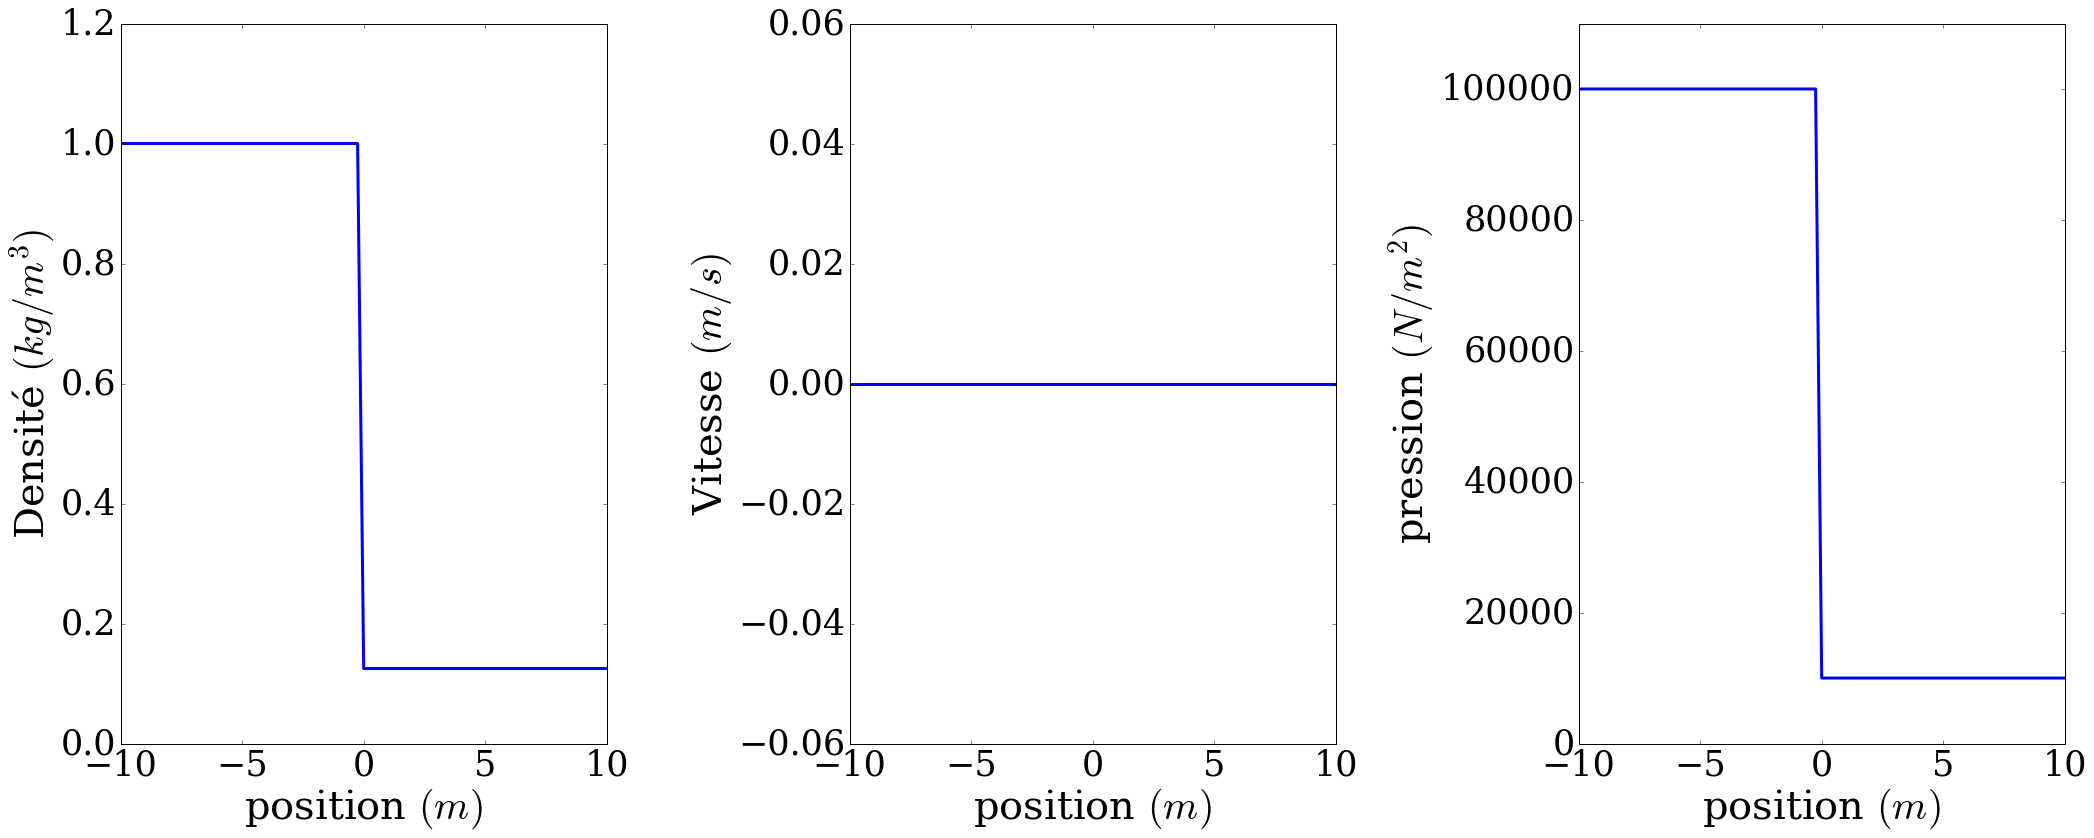

In [9]:
figure = pyplot.figure(figsize = (30, 25))
figure.subplots_adjust(left = 0.1, bottom = 0.3,
                       right = 1, top = 0.7, wspace = .5, hspace = .5)

pyplot.subplot(1, 3, 1)
pyplot.plot(x, u1, 'b-', lw=3)
pyplot.ylabel('Densité $(kg/m^{3})$',fontsize=40)
pyplot.ylim(0,1.2)
pyplot.xlabel('position $(m)$',fontsize=40)
pyplot.tick_params(axis='both', labelsize=35)


pyplot.subplot(1, 3, 2)
pyplot.plot(x, u2, 'b-', lw=3)
pyplot.ylabel('Vitesse $(m/s)$',fontsize=40)
pyplot.xlabel('position $(m)$',fontsize=40)
pyplot.tick_params(axis='both', labelsize=35)

pyplot.subplot(1, 3, 3)
pyplot.plot(x, u3, 'b-', lw=3)
pyplot.ylabel('pression $(N/m^{2})$',fontsize=40)
pyplot.ylim(0,110000)
pyplot.xlabel('position $(m)$',fontsize=40)
pyplot.tick_params(axis='both', labelsize=35)

En plus des conditions initiales, il nous faut définir une fonction qui va nous servire lors de la résolution de notre système d'équations différentielles partielles. Cette dernière représente le flux, dont l'expréssion est décrit dans l'introduction. Cette fonction aura pour entrée un tableau u qui stock les nx valeurs pour les 3 inconnues, c'est à dire $\rho$, $\rho v$ et $\rho e_{T}$. Ainsi, la fonction flux(u) nous retourne sous forme d'un tableau de même forme que u, les valeurs du flux.

Création de la fonction flux expli -> meme idée que phugoid

In [10]:
def flux(u):

    """Calcul du vecteur flux

    Paramètres
    ----------
    u[0]  : tableau de floats
        rho
    u[1]  : tableaux de floats
        rho*u
    u[2]  : tableau de floats
        rho*e_T
        
    Returns
    -------
        F : tableau
        tableau avec le vecteur flux pour tout point x
    """

    return numpy.array([u[1,:],(u[1,:]**2/u[0,:])+((gamma-1)*(u[2,:]-(0.5*(u[1,:]**2/u[0,:])))),
            (u[2,:]+((gamma-1)*(u[2,:]-0.5*(u[1,:]**2/u[0,:]))))*(u[1,:]/u[0,:])])

##### Résolution du problème:

Dans la section précédente, nous avons posé les conditions initiales de notre sytème, mais si on regarde nos équations, on remarque que les solutions pour la vitesse et la pression ne seront pas directement donné comme telle. On aura comme solution $\rho v$ et $\rho e_{T}$ donc nous devons modifier le code précédent en sachant que pour la vitesse, il suffit de multiplier par $\rho$. Par contre, pour calculer $\rho e_{T}$ à l'instant initiale, il faut repartir de l'expression de la pression rappelé çi-dessus en incluant les données de $v$ et $\rho$ à l'instant initial. Etant donné que la vitesse est nul à $t=0s$, on en déduit que $$\rho e_{T}(t=0) = \frac {P(t=0)}{(\gamma-1)}$$ Pour finir, on va remplire le fameux tableau u avec nos variables. Ce dernier sera le point de départ de la résolution numérique de notre problème.

commentaire sur u3 qui n'est pas la pression mais ...

In [11]:
t_sim = 0.01
dx = 0.25
dt = 0.0002

gamma = 1.4

x1 = numpy.ones(nx)
    
u1 = x1*rho_L                        # densité à gauche du diaphragme
u1[int((nx-1)/2):] = rho_R           # densité à droite du diaphragme

u2 = x1*rho_L*u_L                    # vitesse*densité à gauche du diaphragme
u2[int((nx-1)/2):] = rho_R*u_R       # vitesse*densité à droite du diaphragme

u3 = x1*p_L/(gamma-1)                # rho*e_T à gauche du diaphragme
u3[int((nx-1)/2):] = p_R/(gamma-1)   # rho*e_T à droite du diaphragme

u = numpy.empty((3,nx))
u = numpy.array([u1,u2,u3])

In [12]:
def Richtmyer(u, t_sim, dt, dx):
    """ Calcul la solution avec la méthode de Richtmyer
    
    Paramètres
    ----------
    u1    : tableau de floats
            Densité au pas de temps correspondant
    u2    : tableau de floats
            Densité au pas de temps correspondant
    u3    : tableau de floats
            Densité au pas de temps correspondant
    nt     : int
            Nombre de pas de temps
    dt     : float
            Taille des pas de temps
    dx     : float
            réseau d'espace
    
    Returns
    -------
    rho_n : array of floats
            Density after nt time steps at every point x
    """
   
    nt= int(t_sim/dt)+1

    u_n = numpy.zeros((nt,len(u),nx))
    u_n[:,:,:nx] = u.copy()
    u_star = numpy.empty_like(u)
    u_star = u.copy()

    for t in range(1,nt):
        F = flux(u)
        u_star[:,1:] = 0.5 * (u[:,1:]+u[:,:-1] - dt/dx * (F[:,1:] - F[:,:-1]))
        Fstar = flux(u_star)
        u_n[t,:,:-1] = u[:,:-1] - dt/dx * (Fstar[:,1:]-Fstar[:,:-1])
        u = u_n[t,:,:].copy()
        
        # On impose nos conditions au bords du tube
        u[:,0]  = u_n[0,:,0]
        u[:,-1] = u_n[0,:,-1]
    
    #On extrait chaque composante de u pour la dernière étape
    un[0] = u_n[nt-1,0,:]
    un[1] = u_n[nt-1,1,:]
    un[2] = u_n[nt-1,2,:]
    

In [13]:
un = numpy.empty((3,nx))

Richtmyer(u, t_sim, dt, dx)

rho = numpy.zeros(nx)
rho = un[0]
v   = numpy.zeros(nx)
v   = un[1]/un[0]
p   = numpy.zeros(nx)
p   = (gamma-1)*(un[2]-.5*un[1]**2/un[0])

In [14]:
# On récupère nos valeurs du tableau pour x=2.5m
L=12.5 # en m
indx = int(L/dx)

print("→ Densité à x = 2.5m à l'instant t = 0.01s :",round(rho[indx],2),"kg/m^3")
print("→ Vitesse à x = 2.5m à l'instant t = 0.01s :",round(v[indx],2),"m/s")
print("→ Pression à x = 2.5m à l'instant t = 0.01s :",round(p[indx],2),"N/m^2")

→ Densité à x = 2.5m à l'instant t = 0.01s : 0.37 kg/m^3
→ Vitesse à x = 2.5m à l'instant t = 0.01s : 292.61 m/s
→ Pression à x = 2.5m à l'instant t = 0.01s : 30250.89 N/m^2


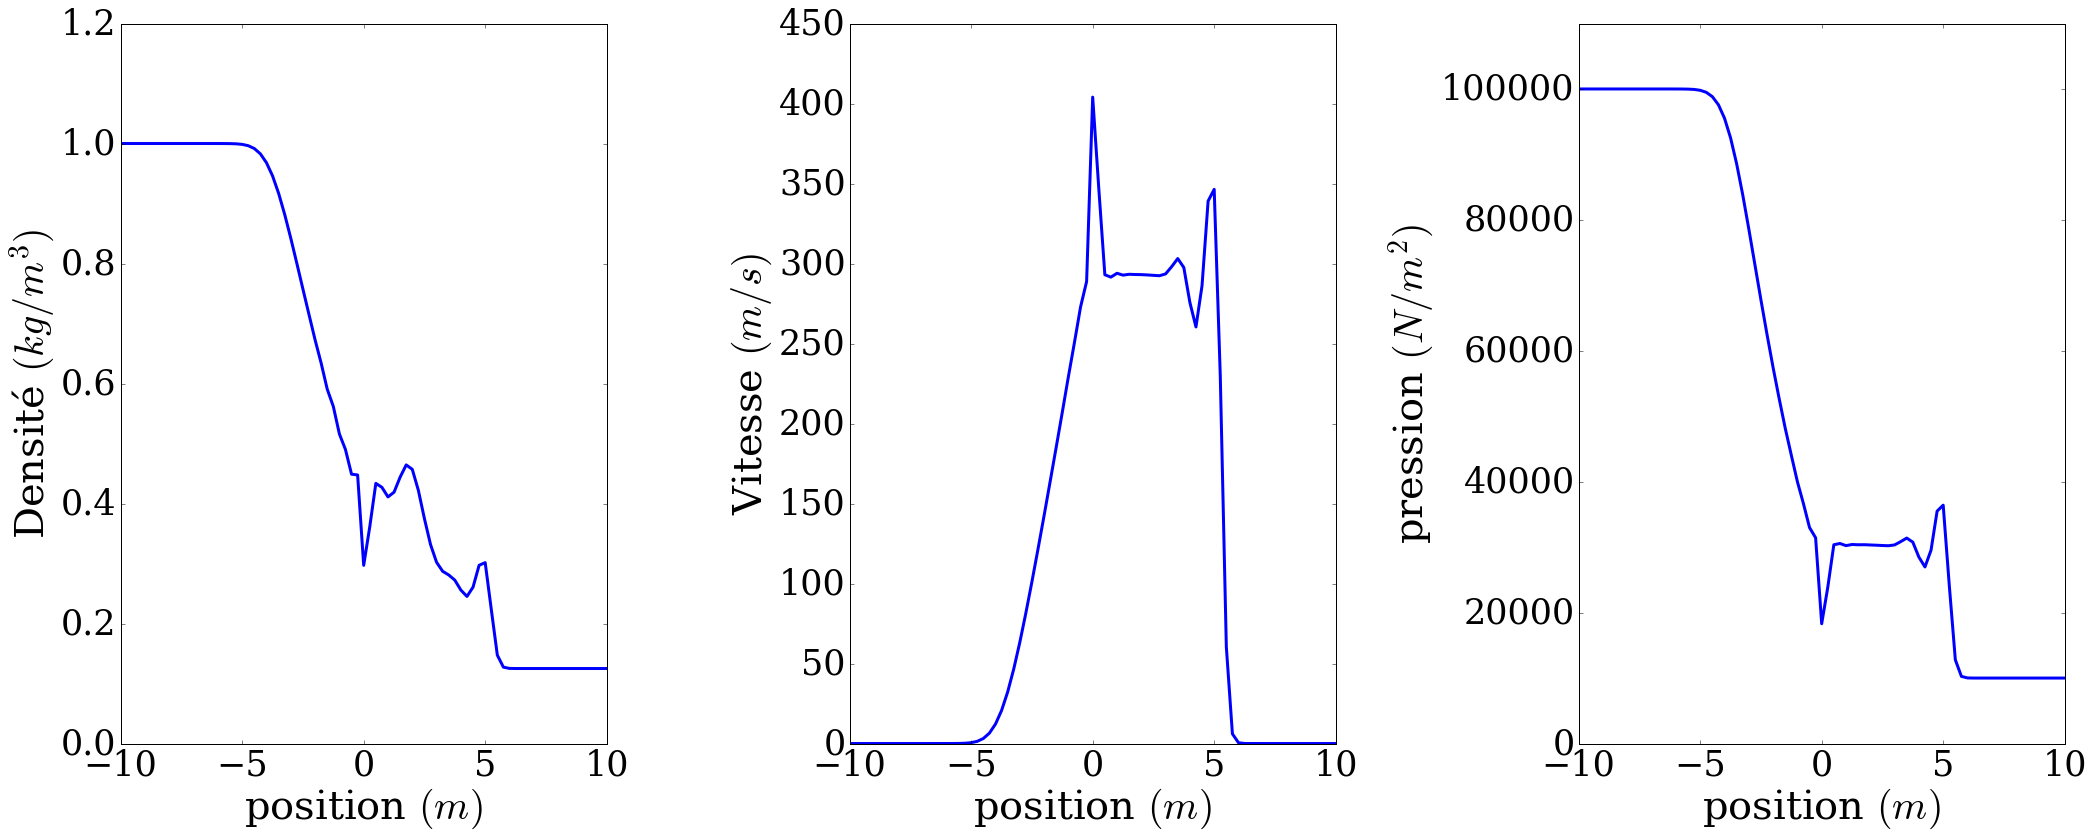

In [15]:
figure = pyplot.figure(figsize = (30, 25))
figure.subplots_adjust(left = 0.1, bottom = 0.3,
                       right = 1, top = 0.7, wspace = .5, hspace = .5)

pyplot.subplot(1, 3, 1)
pyplot.plot(x, rho, 'b-', lw=3)
pyplot.ylabel('Densité $(kg/m^{3})$',fontsize=40)
pyplot.ylim(0,1.2)
pyplot.xlabel('position $(m)$',fontsize=40)
pyplot.tick_params(axis='both', labelsize=35)


pyplot.subplot(1, 3, 2)
pyplot.plot(x, v, 'b-', lw=3)
pyplot.ylabel('Vitesse $(m/s)$',fontsize=40)
pyplot.xlabel('position $(m)$',fontsize=40)
pyplot.tick_params(axis='both', labelsize=35)

pyplot.subplot(1, 3, 3)
pyplot.plot(x, p, 'b-', lw=3)
pyplot.ylabel('pression $(N/m^{2})$',fontsize=40)
pyplot.ylim(0,110000)
pyplot.xlabel('position $(m)$',fontsize=40)
pyplot.tick_params(axis='both', labelsize=35)

---
##### x. Sources:

---

---

###### The cell below loads the style of the notebook.

In [16]:
from IPython.core.display import HTML
css_file = '../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())